<a href="https://colab.research.google.com/github/anasayago/PracticasAI/blob/main/TelecomX_LATAM_AnaSayago.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Diccionario de datos**
* customerID: número de identificación único de cada cliente
* Churn: si el cliente dejó o no la empresa

* gender: género (masculino y femenino)
* SeniorCitizen: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
* Partner: si el cliente tiene o no una pareja
* Dependents: si el cliente tiene o no dependientes
* tenure: meses de contrato del cliente

* PhoneService: suscripción al servicio telefónico
* MultipleLines: suscripción a más de una línea telefónica

* InternetService: suscripción a un proveedor de internet
* OnlineSecurity: suscripción adicional de seguridad en línea
* OnlineBackup: suscripción adicional de respaldo en línea
* DeviceProtection: suscripción adicional de protección del dispositivo
* TechSupport: suscripción adicional de soporte técnico, menor tiempo de espera
* StreamingTV: suscripción de televisión por cable
* StreamingMovies: suscripción de streaming de películas

* Contract: tipo de contrato
* PaperlessBilling: si el cliente prefiere recibir la factura en línea
* PaymentMethod: forma de pago

* Charges.Monthly: total de todos los servicios del cliente por mes
* Charges.Total: total gastado por el cliente

#📌 Extracción

In [129]:
#cargar los datos desde la API de GIT
import pandas as pd
import numpy as np
df = pd.read_json('https://raw.githubusercontent.com/sthemonica/alura-voz/main/Dados/Telco-Customer-Churn.json')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformación

In [130]:

customer_df = pd.json_normalize(df['customer'])
phone_df = pd.json_normalize(df['phone'])
internet_df = pd.json_normalize(df['internet'])
account_df = pd.json_normalize(df['account'])
#Concatenar el DataFrame original con los nuevos DataFrames
df = pd.concat([df.drop(columns=['customer', 'phone', 'internet', 'account']),
                customer_df,
                phone_df,
                internet_df,
                account_df], axis=1)
#Mostrar el DataFrame resultante
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [131]:
df.info()
colum_string = ['customerID','Churn','gender', 'Partner', 'Dependents', 'PhoneService',
                'MultipleLines', 'InternetService', 'OnlineSecurity',
                'OnlineBackup', 'DeviceProtection', 'TechSupport',
                'StreamingTV', 'StreamingMovies', 'Contract','PaperlessBilling',
                'PaymentMethod']
column_bool = ['SeniorCitizen']


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [132]:
#Convertir las columnas de tipo string
df[colum_string] = df[colum_string].astype(str)
#Convertir las columnas de tipo booleano
df[column_bool] = df[column_bool].astype(bool)
df['Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')
df['Charges.Total'] = df['Charges.Total'].fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   bool   
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [133]:
#valores nulos
df.isnull().sum()
#valores unicos
df.nunique()

customerID          7267
Churn                  3
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
Charges.Monthly     1585
Charges.Total       6531
dtype: int64

In [134]:
#valores unicos de las columas de la lista colum_string
for column in colum_string:
    print({column})
    print(df[column].unique())
    print("\n")

{'customerID'}
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']


{'Churn'}
['No' 'Yes' '']


{'gender'}
['Female' 'Male']


{'Partner'}
['Yes' 'No']


{'Dependents'}
['Yes' 'No']


{'PhoneService'}
['Yes' 'No']


{'MultipleLines'}
['No' 'Yes' 'No phone service']


{'InternetService'}
['DSL' 'Fiber optic' 'No']


{'OnlineSecurity'}
['No' 'Yes' 'No internet service']


{'OnlineBackup'}
['Yes' 'No' 'No internet service']


{'DeviceProtection'}
['No' 'Yes' 'No internet service']


{'TechSupport'}
['Yes' 'No' 'No internet service']


{'StreamingTV'}
['Yes' 'No' 'No internet service']


{'StreamingMovies'}
['No' 'Yes' 'No internet service']


{'Contract'}
['One year' 'Month-to-month' 'Two year']


{'PaperlessBilling'}
['Yes' 'No']


{'PaymentMethod'}
['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']




In [135]:
#valores repetidos en customerID
df['customerID'].duplicated().sum()

np.int64(0)

In [136]:
#extraer de Churn los datos con valor '' guardarlos  y eliminarlos del DataFrame

#Eliminar las filas donde Churn es NaN  
registros_eliminados = df[df['Churn'] == '']
# Guardar los registros eliminados en un nuevo DataFrame
df = df[df['Churn'] != '']

#valores unicos de Churn
print(df['Churn'].unique())
registros_eliminados.head()

['No' 'Yes']


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
30,0047-ZHDTW,,Female,False,No,No,11,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.00,929.30
75,0120-YZLQA,,Male,False,No,No,71,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.90,1355.10
96,0154-QYHJU,,Male,False,No,No,29,Yes,No,DSL,...,Yes,No,Yes,No,No,One year,Yes,Electronic check,58.75,1696.20
98,0162-RZGMZ,,Female,True,No,No,5,Yes,No,DSL,...,Yes,No,Yes,No,No,Month-to-month,No,Credit card (automatic),59.90,287.85
175,0274-VVQOQ,,Male,True,Yes,No,65,Yes,Yes,Fiber optic,...,Yes,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),103.15,6792.45


In [137]:
#Tranformar las columas YES y NO a 1 y 0 en varias columnas
df = df.applymap(lambda x: 1 if x == 'Yes' else 0 if x in ['No', 'No internet service','No phone service'] else x)


/var/folders/7l/3zvr6nj91ds_dl_w2h_7drsh0000gn/T/ipykernel_17821/2165195973.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: 1 if x == 'Yes' else 0 if x in ['No', 'No internet service','No phone service'] else x)


In [138]:
#agregar la columna nueva 'Charges.Diary' al DataFrame
df['Charges.Diary'] = (df['Charges.Monthly'] / 30).round(2)

In [139]:
new_column_names = {
    'customerID': 'ID Cliente',
    'Churn': 'Abandono',  
    'gender': 'Género',
    'SeniorCitizen': 'Mayor de 65 años',
    'Partner': 'Tiene Pareja',
    'Dependents': 'Tiene Dependientes',
    'tenure': 'Duración del Contrato (meses)',
    'PhoneService': 'Servicio Telefónico',
    'MultipleLines': 'Múltiples Líneas',
    'InternetService': 'Servicio de Internet',
    'OnlineSecurity': 'Seguridad en Línea',
    'OnlineBackup': 'Respaldo en Línea',
    'DeviceProtection': 'Protección del Dispositivo',
    'TechSupport': 'Soporte Técnico',
    'StreamingTV': 'TV por Cable',
    'StreamingMovies': 'Streaming de Películas',
    'Contract': 'Tipo de Contrato',
    'PaperlessBilling': 'Facturación Sin Papel',
    'PaymentMethod': 'Método de Pago',
    'Charges.Monthly': 'Costo Mensual',
    'Charges.Total': 'Costo Total',
    'Charges.Diary': 'Costo Diario'
}

# Renombramos las columnas
df.rename(columns=new_column_names, inplace=True)

In [140]:
# Diccionarios de entrada y reemplazo
replacement_dict = {
    'Género': {'Female': 'F', 'Male': 'M'},
    'Servicio de Internet': {'Fiber optic': 'Fibra Óptica'},
    'Tipo de Contrato':{'One year': 'Anual' ,'Month-to-month': 'Mensual' ,'Two year': 'Bianual'},
    'Método de Pago':{'Mailed check':'Cheque por Correo', 'Electronic check':'Cheque electrónico' ,'Credit card (automatic)':'Tarjeta de crédito (automático)','Bank transfer (automatic)': 'Transferencia bancaria (automático)'}  
}

# Reemplazar datos en el DataFrame usando los diccionarios
for column, replacements in replacement_dict.items():
    df[column] = df[column].replace(replacements)

df.head()

,ID Cliente,Abandono,Género,Mayor de 65 años,Tiene Pareja,Tiene Dependientes,Duración del Contrato (meses),Servicio Telefónico,Múltiples Líneas,Servicio de Internet,...,Protección del Dispositivo,Soporte Técnico,TV por Cable,Streaming de Películas,Tipo de Contrato,Facturación Sin Papel,Método de Pago,Costo Mensual,Costo Total,Costo Diario
0,0002-ORFBO,0,F,False,1,1,9,1,0,DSL,...,0,1,1,0,Anual,1,Cheque por Correo,65.6,593.30,2.19
1,0003-MKNFE,0,M,False,0,0,9,1,1,DSL,...,0,0,0,1,Mensual,0,Cheque por Correo,59.9,542.40,2.00
2,0004-TLHLJ,1,M,False,0,0,4,1,0,Fibra Óptica,...,1,0,0,0,Mensual,1,Cheque electrónico,73.9,280.85,2.46
3,0011-IGKFF,1,M,True,1,0,13,1,0,Fibra Óptica,...,1,0,1,1,Mensual,1,Cheque electrónico,98.0,1237.85,3.27
4,0013-EXCHZ,1,F,True,1,0,3,1,0,Fibra Óptica,...,0,1,1,0,Mensual,1,Cheque por Correo,83.9,267.40,2.80


#📊 Carga y análisis

In [141]:
#Analisis descriptivo
df.describe(include='all')

,ID Cliente,Abandono,Género,Mayor de 65 años,Tiene Pareja,Tiene Dependientes,Duración del Contrato (meses),Servicio Telefónico,Múltiples Líneas,Servicio de Internet,...,Protección del Dispositivo,Soporte Técnico,TV por Cable,Streaming de Películas,Tipo de Contrato,Facturación Sin Papel,Método de Pago,Costo Mensual,Costo Total,Costo Diario
count,7043,7043.000000,7043,7043,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043,...,7043.000000,7043.000000,7043.000000,7043.000000,7043,7043.000000,7043,7043.000000,7043.000000,7043.000000
unique,7043,NaN,2,2,NaN,NaN,NaN,NaN,NaN,3,...,NaN,NaN,NaN,NaN,3,NaN,4,NaN,NaN,NaN
top,0002-ORFBO,NaN,M,False,NaN,NaN,NaN,NaN,NaN,Fibra Óptica,...,NaN,NaN,NaN,NaN,Mensual,NaN,Cheque electrónico,NaN,NaN,NaN
freq,1,NaN,3555,5901,NaN,NaN,NaN,NaN,NaN,3096,...,NaN,NaN,NaN,NaN,3875,NaN,2365,NaN,NaN,NaN
mean,NaN,0.265370,NaN,NaN,0.483033,0.299588,32.371149,0.903166,0.421837,NaN,...,0.343888,0.290217,0.384353,0.387903,NaN,0.592219,NaN,64.761692,2279.734304,2.158675
std,NaN,0.441561,NaN,NaN,0.499748,0.458110,24.559481,0.295752,0.493888,NaN,...,0.475038,0.453895,0.486477,0.487307,NaN,0.491457,NaN,30.090047,2266.794470,1.003088
min,NaN,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,...,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,18.250000,0.000000,0.610000
25%,NaN,0.000000,NaN,NaN,0.000000,0.000000,9.000000,1.000000,0.000000,NaN,...,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,35.500000,398.550000,1.180000
50%,NaN,0.000000,NaN,NaN,0.000000,0.000000,29.000000,1.000000,0.000000,NaN,...,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,NaN,70.350000,1394.550000,2.340000
75%,NaN,1.000000,NaN,NaN,1.000000,1.000000,55.000000,1.000000,1.000000,NaN,...,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,NaN,89.850000,3786.600000,2.990000


## Analisis Descriptivo 
### Tasa de abandono
La tasa de abandono promedio es del 26.54%. Esto indica que aproximadamente un cuarto de los clientes deja el servicio, lo cual es una señal de alerta para la empresa.
### Demografía del cliente:
* Género: La mayoría son hombres (51.69%).
* Mayor de 65 años: Solo el 48.31% de los clientes son mayores de 65 años, lo que sugiere que la mayoría son más jóvenes.
* Tiene Pareja: El 48.30%  tienen pareja.
* Tiene Dependientes: El 29.96% tienen dependientes.

### Duración del contrato:
Duración promedio 32.37 meses, con una desviación estándar de 24.56 meses. 

### Servicios adicionales:
* Servicio telefónico: El 90.32% tienen servicio telefónico.
* Múltiples líneas: El 42.18% tienen múltiples líneas.
* Servicio de internet: El 90.32% tienen servicio de internet.
* Protección del dispositivo: El 34.39% tienen protección del dispositivo.
* Soporte técnico: El 29.02% tienen soporte técnico.
* TV por cable: El 38.44% tienen TV por cable.
* Streaming de películas: El 38.79% tienen streaming de películas.

### Tipo de contrato y facturación:
* Tipo de Contrato: La mayoría son mensuales (59.22%).
* Facturación Sin Papel: El 59.22% prefieren la facturación sin papel.
* Método de Pago: El 23.65% prefieren el cheque electrónico.

### Costos:
* Costo mensual promedio de $64.76
* Costo total promedio es de $2,279.73
* Costo diario promedio es de $2.16

### Conclusión

* Retención de clientes: La alta tasa de abandono (26.54%) es una preocupación significativa. La empresa debe investigar las razones detrás de este abandono y desarrollar estrategias para mejorar la retención de clientes, como ofrecer mejores servicios al cliente, promociones de fidelización, o mejorar la calidad del servicio.
* Demografía del cliente: La mayoría de los clientes son hombres y no mayores de 65 años. Esto sugiere que la empresa debe enfocarse en segmentos de mercado más jóvenes y masculinos para sus campañas de marketing y desarrollo de productos.
* Servicios Adicionales: La alta adopción de servicios como el servicio telefónico y el servicio de internet indica que estos son servicios clave. Sin embargo, la baja adopción de servicios adicionales como la protección del dispositivo y el soporte técnico sugiere una oportunidad para aumentar los ingresos mediante la promoción de estos servicios.
* Duración del Contrato: La variabilidad en la duración del contrato sugiere que la empresa debe trabajar en la estandarización y la mejora de la experiencia del cliente para asegurar contratos más largos y estables.
* Costos: Los costos mensuales y totales son relativamente bajos, lo que puede ser una ventaja competitiva. Sin embargo, la empresa debe asegurarse de que estos costos sean sostenibles y que no estén afectando la calidad del servicio.


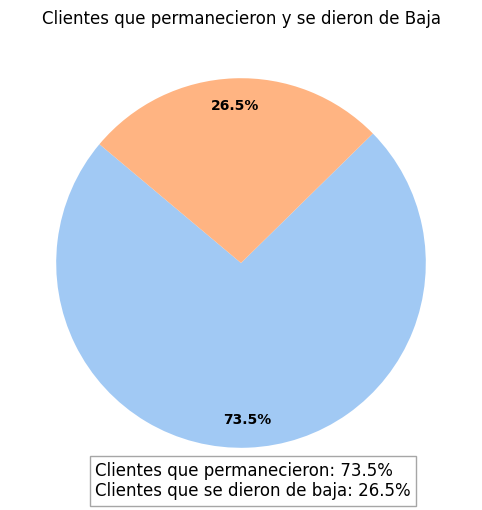

In [182]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

abandono_counts = df['Abandono'].value_counts()

# Definir una paleta de colores suaves
colors = sns.color_palette("pastel", 2)

# Crear el gráfico de pastel
plt.figure(figsize=(8, 6))
wedges, texts, autotexts = plt.pie(abandono_counts, autopct='%1.1f%%', startangle=140, colors=colors, pctdistance=0.85)

# Ajustar la posición de los textos de porcentaje
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_weight('bold')

#decripcion de las categorias
plt.gcf().text(
    0.33, 0.10,
    'Clientes que permanecieron: {:.1f}%\nClientes que se dieron de baja: {:.1f}%'.format(
        abandono_counts[0] / abandono_counts.sum() * 100,
        abandono_counts[1] / abandono_counts.sum() * 100
    ),
    fontsize=12,
    ha='left',
    va='bottom',
    bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray')
) 

plt.title('Clientes que permanecieron y se dieron de Baja')
plt.ylabel('')
plt.show()

## Análisis de Correlación de Variables

Se analiza las relaciones entre las variables numéricas usando la matriz de correlación de Pearson. 

### Coeficiente de Correlación de Pearson
El coeficiente de correlación de Pearson (r) varía entre -1 y 1:
* r = 1 indica una correlación positiva perfecta.
* r = -1 indica una correlación negativa perfecta.
* r = 0 indica que no hay correlación lineal.

In [142]:
# Seleccionar solo las columnas numéricas
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
correlation_matrix = numeric_columns.corr()

# Mostrar la matriz de correlación
print(correlation_matrix)

                               Abandono  Tiene Pareja  Tiene Dependientes  \
Abandono                       1.000000     -0.150448           -0.164221   
Tiene Pareja                  -0.150448      1.000000            0.452676   
Tiene Dependientes            -0.164221      0.452676            1.000000   
Duración del Contrato (meses) -0.352229      0.379697            0.159712   
Servicio Telefónico            0.011942      0.017706           -0.001762   
Múltiples Líneas               0.040102      0.142057           -0.024526   
Seguridad en Línea            -0.171226      0.143106            0.080972   
Respaldo en Línea             -0.082255      0.141498            0.023671   
Protección del Dispositivo    -0.066160      0.153786            0.013963   
Soporte Técnico               -0.164674      0.119999            0.063268   
TV por Cable                   0.063228      0.124666           -0.016558   
Streaming de Películas         0.061382      0.117412           -0.039741   

Matplotlib is building the font cache; this may take a moment.


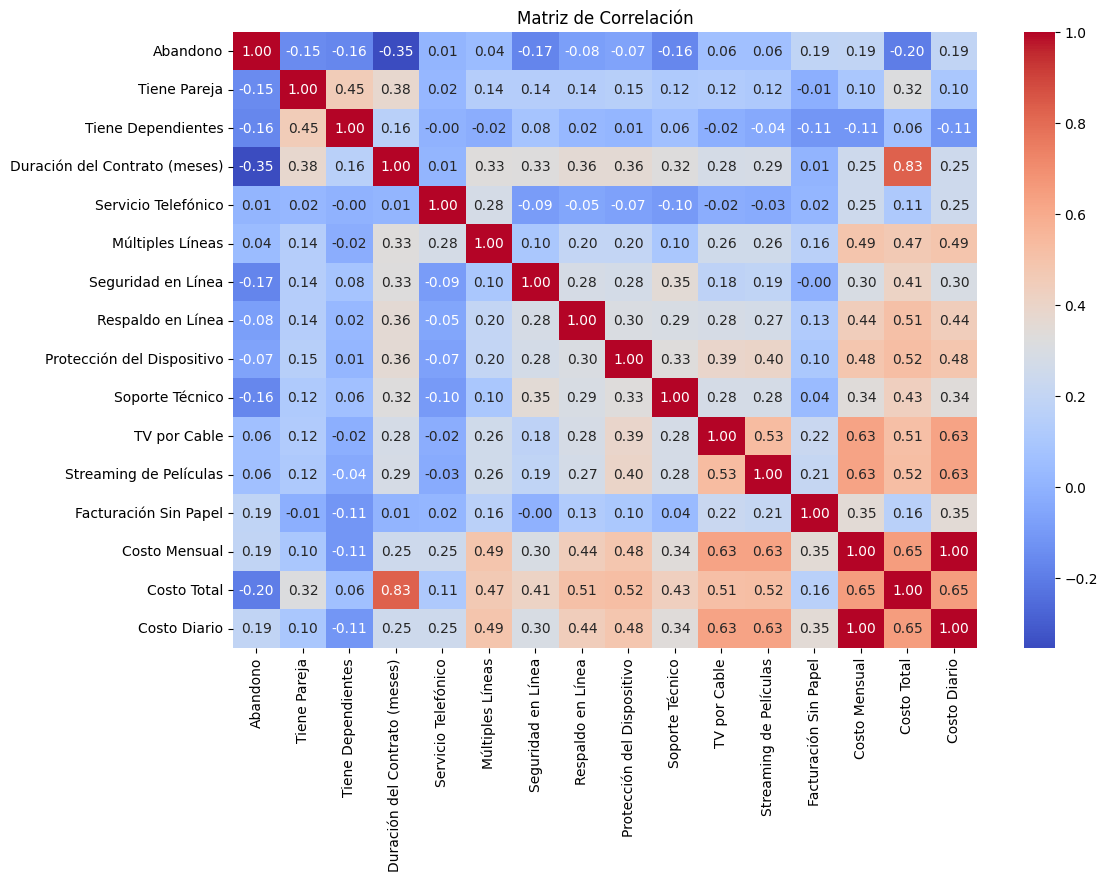

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Mapa de calor de la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()

### Comentarios sobre el mapa de calor de la matriz de correlación
1. La variable 'Abandono' (churn) muestra una correlación negativa moderada con la 'Duración del Contrato (meses)' (-0.35), lo que indica que los clientes con contratos más largos tienden a **abandonar menos**.
2. 'Abandono' también tiene correlaciones negativas con servicios adicionales como 'Seguridad en Línea', 'Soporte Técnico' y 'Protección del Dispositivo', sugiriendo que quienes contratan estos servicios adicionales tienden a permanecer más tiempo.
3. Existe una correlación positiva entre 'Abandono' y 'Facturación Sin Papel' (0.19) y 'Costo Mensual' (0.19), lo que podría indicar que quienes pagan más o prefieren facturación digital tienden a abandonar más.
4. Las variables de servicios adicionales (como 'TV por Cable', 'Streaming de Películas', etc.) están fuertemente correlacionadas entre sí, lo que sugiere que los clientes suelen contratar varios servicios adicionales juntos.
5. 'Costo Total' está altamente correlacionado con la 'Duración del Contrato', lo cual es lógico ya que a mayor tiempo de permanencia, mayor gasto acumulado.

En resumen, la retención de clientes parece estar asociada a la duración del contrato y la contratación de servicios adicionales. Se recomienda a la empresa incentivar contratos de mayor duración y la adopción de servicios complementarios para reducir la tasa de abandono.

#📄Informe final